In [1]:
import pkg_resources

# Print version of cmapPy being used in current conda environment 
pkg_resources.get_distribution("cmapPy").version

'4.0.1'

In [2]:
from cmapPy.pandasGEXpress.parse import parse
import numpy as np
import pandas as pd


In [3]:
#get metadata for a specific cell line 
cell_info = pd.read_csv("Downloads\GSE92742_Broad_LINCS_cell_info.txt", sep="\t")
MCH58_cellinfo =cell_info[cell_info["cell_id"] == "MCH58"]
MCH58_cellinfo

,cell_id,cell_type,base_cell_id,precursor_cell_id,modification,sample_type,primary_site,subtype,original_growth_pattern,provider_catalog_id,original_source_vendor,donor_age,donor_sex,donor_ethnicity
0,A375,cell line,A375,-666,-666,tumor,skin,malignant melanoma,adherent,CRL-1619,ATCC,54,F,-666


In [2]:
#get signatures ids of a specific cell line 
sig_info = pd.read_csv("GSE92742_Broad_LINCS_sig_info.txt", sep="\t")
MCH58_cell_ids = sig_info["sig_id"][sig_info["cell_id"] == "MCH58"]
len(MCH58_cell_ids)


D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
#using ids we obtained, we subset of samples/columns in level 5 
MCH58_cell_line_data_only = parse("E:\GSE92742_Broad_LINCS_Level5_COMPZ.MODZ_n473647x12328.gctx",cid=MCH58_cell_ids)
df=MCH58_cell_line_data_only.data_df
#then we store it in a text file
df.to_csv("E:\Cell_lines\HEPG2_cell_line2.txt",sep="\t")

In [4]:
#Searching for 4 transcriptional regulating genes in normal skin fibroblast cell line
#to measure the correlation between them

file=open('E:\Cell_lines\MCH58_cell_line.txt',"r")
metadata=file.readline()+"\n"+file.readline()
print("Correlation of transcriptional regulating genes in normal skin fibroblast cell line")
file.readline()
file.readline()
for x in range(0, 12328):
    line=file.readline()
    s=np.array(line.split("\t")).astype(np.float)
    if (int(s[0])==6923):
        n1=s[1:].astype(np.float)
    elif int(s[0])==468:
        n2=s[1:].astype(np.float)
    elif int(s[0])==23019:
        n3=s[1:].astype(np.float)
    elif int(s[0])==6772:
        n4=s[1:].astype(np.float)


print(np.corrcoef(n1,n2))

print(np.corrcoef(n2,n3))

print(np.corrcoef(n3,n4))


correlation transcriptional regulating genes in normal skin fibroblast cell line
[[1.         0.62366986]
 [0.62366986 1.        ]]
[[ 1.        -0.1927498]
 [-0.1927498  1.       ]]
[[ 1.         -0.02487548]
 [-0.02487548  1.        ]]


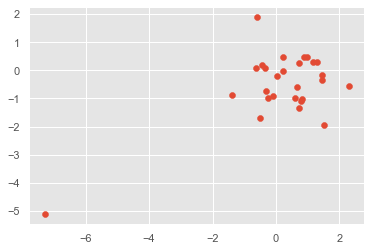

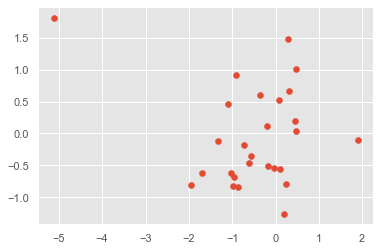

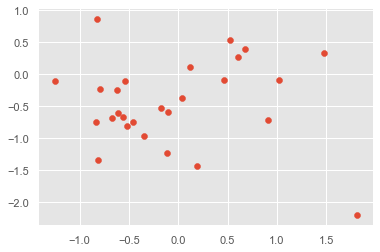

In [118]:
#results of gene expressions of the four genes on scatter plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(n1, n2)
plt.show()
plt.scatter(n2, n3)
plt.show()
plt.scatter(n3, n4)
plt.show()



In [6]:
#Put results in a dataframe
import pandas as pd

df = pd.DataFrame()
df['a'] = n1
df['b'] = n2
df['c'] = n3
df['d'] = n4
df.corr()

,a,b,c,d
a,1.000000,0.623670,-0.331398,0.382247
b,0.623670,1.000000,-0.192750,0.526528
c,-0.331398,-0.192750,1.000000,-0.024875
d,0.382247,0.526528,-0.024875,1.000000


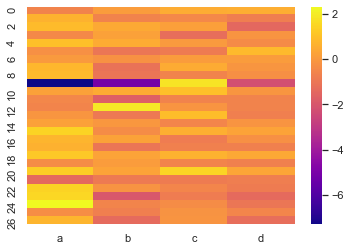

In [7]:
#show results in a heatmap 

import seaborn as sns
import matplotlib.pyplot as plt
sns.set() 
sns.heatmap(df, cmap='plasma')
plt.show()

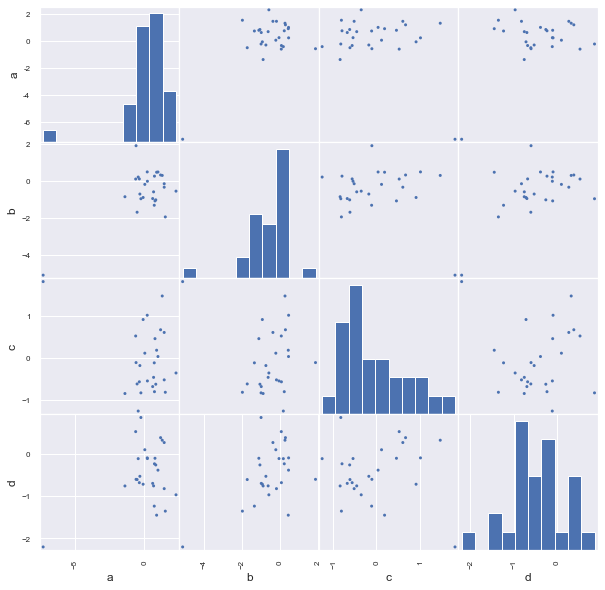

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,alpha=1,figsize=(10, 10))
plt.show()

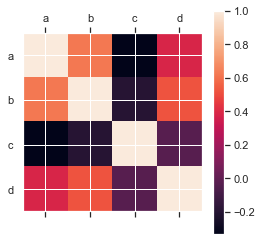

In [9]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()
